In [1]:
print("Anomaly Detection")

Anomaly Detection


#### 1. Outliers
- New data which doesn't belong to general trend (or distribution) of entire data are known as outliers.
- Data belonging to general trend are known as inliners.
- Learning models are impacted by presence of outliers.
- Anomaly detection is another use of outlier detection in which we find out unusual behaviour.
- Data which were detected outliers can be deleted from complete dataset.
- Outliers can also be marked before using them in learning methods
#### 2. Statistical Methods for Univariate Data
- Using Standard Deviation Method - zscore
- Using Interquartile Range Method - IRQ
##### Using Standard Deviation Method
- If univariate data follows Gaussian Distribution, we can use standard deviation to figure out where our data lies


In [2]:
import numpy as np

In [3]:
data = np.random.normal(size=1000)

- Adding More Outliers

In [4]:
data[-5:] = [3.5,3.6,4,3.56,4.2]

In [5]:
from scipy.stats import zscore

- Detecting Outliers

In [6]:
data[np.abs(zscore(data)) > 3] 
# data is at more than 3X of standard deviation from the mean

array([ 3.96164196, -3.76018148, -3.98183466, -3.2247289 ,  3.5       ,
        3.6       ,  4.        ,  3.56      ,  4.2       ])

##### Using Interquartile Range
- For univariate data not following Gaussian Distribution IQR is a way to detect outliers

In [8]:
from scipy.stats import iqr

In [9]:
data = np.random.normal(size=1000)

In [10]:
data[-5:]=[-2,9,11,-3,-21]

In [11]:
iqr_value = iqr(data)

In [12]:
lower_threshold = np.percentile(data,25) - iqr_value*1.5

In [13]:
upper_threshold = np.percentile(data,75) + iqr_value*1.5

In [14]:
upper_threshold

2.883744743137024

In [15]:
lower_threshold

-2.8840423249131755

In [16]:
data[np.where(data < lower_threshold)]

array([ -2.8877279 ,  -3.11871227,  -3.        , -21.        ])

In [17]:
data[np.where(data > upper_threshold)]

array([ 3.27305579,  3.14974278,  9.        , 11.        ])

#### 3. Using Gaussian Mixture Models
- Data might contain more than one peaks in the distribution of data.
- Trying to fit such multi-model data with unimodel won't give a good fit.
- GMM allows to fit such multi-model data.
- Configuration involves number of components in data, n_components.
- covariance_type controls the shape of cluster
1. full : cluster will be modeled to eclipse in arbitrary dir
2. sperical : cluster will be spherical like kmeans
3. diag : cluster will be aligned to axis
- We will see how GMM can be used to find outliers

In [18]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
C2 = np.array([[1., -0.1], [2.7, .2]])
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C)]
          #.7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),np.dot(np.random.randn(n_samples, 2), C2)]


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
X[-5:] = [[4,-1],[4.1,-1.1],[3.9,-1],[4.0,-1.2],[4.0,-1.3]] #adding some outliers

In [26]:
plt.scatter(X[:,0], X[:,1],s=5)

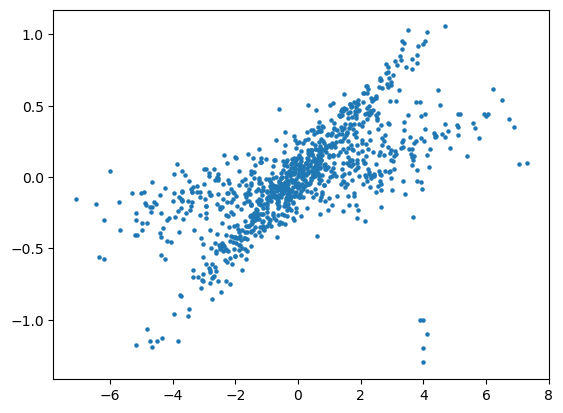

In [27]:
plt.show()

In [28]:
from sklearn.mixture import GaussianMixture

In [29]:
gmm = GaussianMixture(n_components=3)

In [30]:
gmm.fit(X)

GaussianMixture(n_components=3)

In [31]:
pred = gmm.predict(X)

In [32]:
pred[:50]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
plt.scatter(X[:,0], X[:,1],s=10,c=pred)

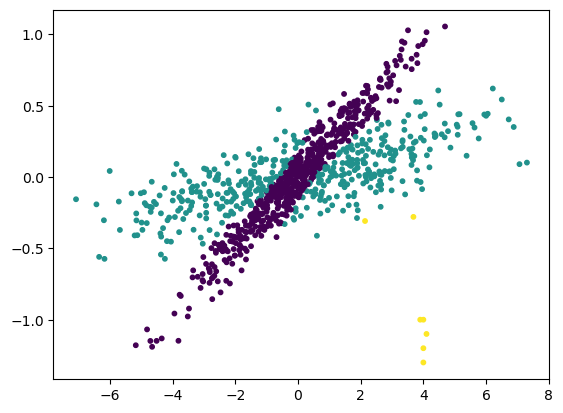

In [34]:
plt.show()

#### 4. Fitting Elliptical Envelope
- The assumption here is, regular data comes from known distribution ( Gaussion distribution )
- Inliner location & variance will be calculated using Mahalanobis distances which is less impacted by outliers.
- Calculate robust covariance fit of the data.

In [36]:
from sklearn.datasets import make_blobs

In [37]:
X,_ = make_blobs(n_features=2, centers=2, cluster_std=2.5, n_samples=1000)

In [38]:
plt.scatter(X[:,0], X[:,1],s=10)

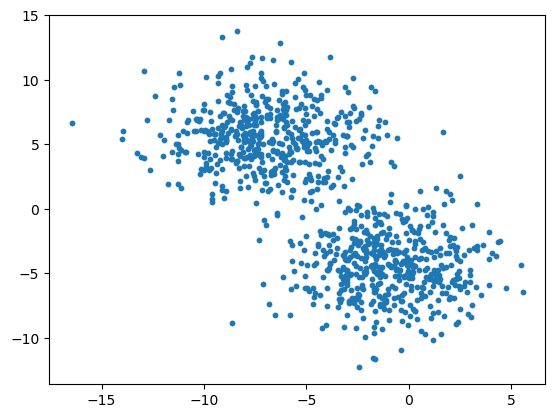

In [39]:
plt.show()

In [40]:
from sklearn.covariance import EllipticEnvelope

In [41]:
ev = EllipticEnvelope(contamination=.1)

In [42]:
ev.fit(X)

EllipticEnvelope()

In [43]:
cluster = ev.predict(X)

In [44]:
plt.scatter(X[:,0], X[:,1],s=10,c=cluster)

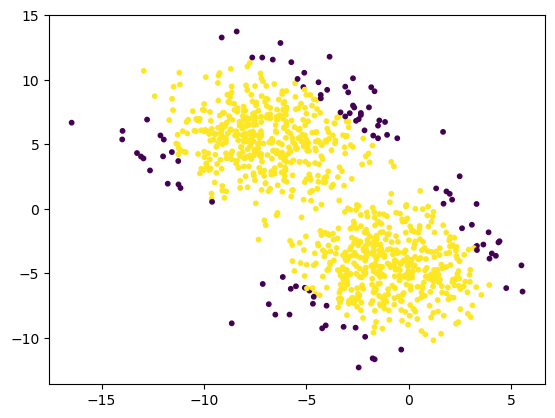

In [45]:
plt.show()

#### 5. Isolation Forest
- Based on RandomForest
- Useful in detecting outliers in high dimension datasets.
- This algorithm randomly selects a feature & splits further.
- Random partitioning produces shorter part for anomolies.
- When a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [46]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [47]:
from sklearn.ensemble import IsolationForest

In [48]:
data = np.r_[X_train,X_test,X_outliers]

In [50]:
#iso = IsolationForest(behaviour='new', contamination='auto')
# Initialize the model
iso = IsolationForest(contamination='auto', random_state=42)

In [51]:
iso.fit(data)

IsolationForest(random_state=42)

In [52]:
pred = iso.predict(data)

In [53]:
plt.scatter(data[:,0], data[:,1],s=10,c=pred)

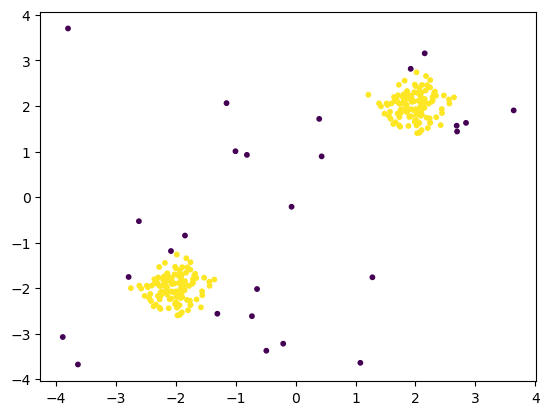

In [54]:
plt.show()

#### 6. Local Outlier Factor
- Based on nearest neighbours
- Suited for moderately high dimension datasets
- LOF computes a score reflecting degree of abnormility of a data.
- LOF Calculation
1. Local density is calculated from k-nearest neighbors.
2. LOF of each data is equal to the ratio of the average local density of his k-nearest neighbors, and its own local density.
3. An abnormal data is expected to have smaller local density.
- LOF tells you not only how outlier the data is but how outlier is it with respect to all data

In [56]:
from sklearn.neighbors import LocalOutlierFactor

In [57]:
lof = LocalOutlierFactor(n_neighbors=25,contamination=.1)

In [58]:
pred = lof.fit_predict(data)

In [59]:
s = np.abs(lof.negative_outlier_factor_)

In [60]:
plt.scatter(data[:,0], data[:,1],s=s*10,c=pred)

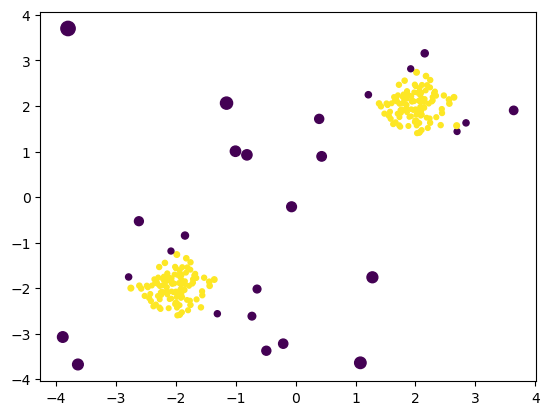

In [61]:
plt.show()

#### 7. Outlier Detection using DBSCAN
- DBSCAN is a clustering method based on density
- Groups data which are closer to each other.
- Doesn't use distance vector calculation method
- Data not close enough to any cluster is not assigned any cluster & these can be anomalies
eps controls the degree of considering a data part of cluster

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
dbscan = DBSCAN(eps=.3)

In [64]:
dbscan.fit(data)

DBSCAN(eps=0.3)

In [65]:
plt.scatter(data[:,0], data[:,1],s=s*10,c=dbscan.labels_)

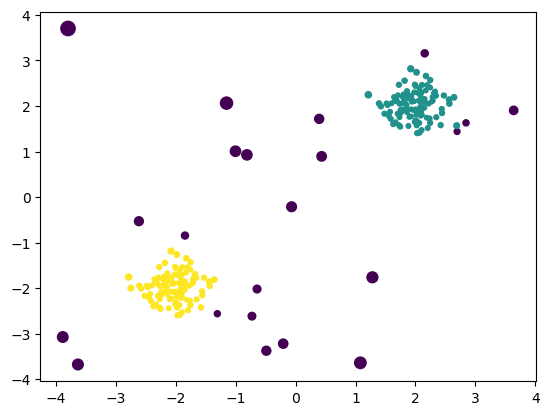

In [66]:
plt.show()

In [69]:
dbscan.labels_ # -1 are outliers will be represented as -1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1, -1,  1